In [5]:
# Research environment functions
from quantopian.research import prices, returns, symbols, volumes
# Main analyis libraries
import numpy as np
import pandas as pd
import scipy as sci

# Cross Sectional analysis libraries
from quantopian.research import run_pipeline
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import USEquityPricing
from quantopian.pipeline.factors import Returns
from quantopian.pipeline.factors import SimpleMovingAverage
from quantopian.pipeline.data.psychsignal import stocktwits
from quantopian.pipeline.experimental import QTradableStocksUS

In [6]:
# Query MU historical pricing data
mu_close = prices(
    assets = symbols('MU'),
    start= '2018-1-1',
    end = '2018-3-8',
    frequency = 'daily'
)

mu_volume = volumes(
    assets = symbols("MU"),
    start = '2018-1-1',
    end = '2018-03-08'
)

In [7]:
mu_close.head()

2018-01-02 00:00:00+00:00    43.66
2018-01-03 00:00:00+00:00    44.98
2018-01-04 00:00:00+00:00    46.87
2018-01-05 00:00:00+00:00    45.78
2018-01-08 00:00:00+00:00    45.54
Freq: C, Name: Equity(5121 [MU]), dtype: float64

In [8]:
mu_volume.head()

2018-01-02 00:00:00+00:00    33415047.0
2018-01-03 00:00:00+00:00    37622955.0
2018-01-04 00:00:00+00:00    46660724.0
2018-01-05 00:00:00+00:00    41802456.0
2018-01-08 00:00:00+00:00    28737652.0
Freq: C, Name: Equity(5121 [MU]), dtype: float64

In [9]:
# Compute 8 and  30 day moving averages on MU's pricing data
mu_sma8 = mu_close.rolling(20).mean()
mu_sma20 = mu_close.rolling(50).mean()

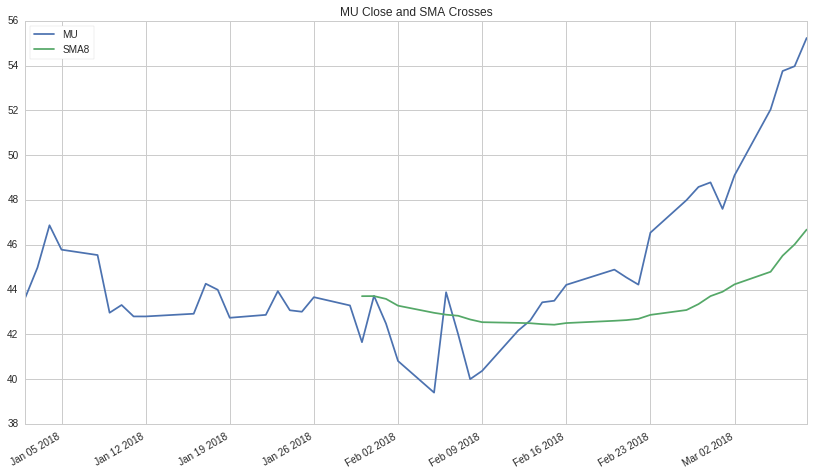

In [10]:
# Combine results into a pandas DataFrame and plot
pd.DataFrame({
    'MU': mu_close,
    'SMA8': mu_sma8,
}).plot(title= "MU Close and SMA Crosses");

In [30]:
# Returns analysis

# select a time range for inspection
period_start = '2018-01-01'
period_end = '2018-03-08'

# query returns data for MU for the given time range
mu_returns = returns(
    assets = symbols('MU'),
    start = period_start,
    end = period_end
) *100

# plot last 10 days of daily returns
mu_returns.head(10)


2018-01-02 00:00:00+00:00    6.151228
2018-01-03 00:00:00+00:00    3.023362
2018-01-04 00:00:00+00:00    4.201867
2018-01-05 00:00:00+00:00   -2.325581
2018-01-08 00:00:00+00:00   -0.524246
2018-01-09 00:00:00+00:00   -5.654370
2018-01-10 00:00:00+00:00    0.802979
2018-01-11 00:00:00+00:00   -1.177557
2018-01-12 00:00:00+00:00    0.000000
2018-01-16 00:00:00+00:00    0.280374
Freq: C, Name: Equity(5121 [MU]), dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efd80c901d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7efd8ad863d0>], dtype=object)

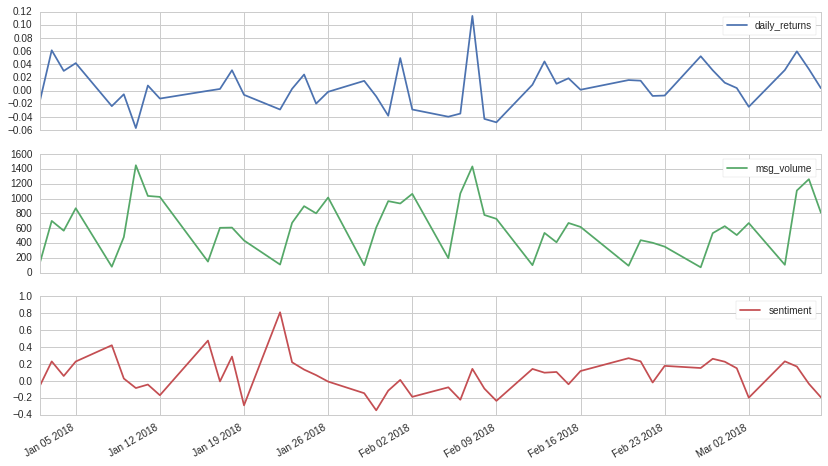

In [36]:
# make a data pipeline
def make_pipeline():
       
    # Measure Sentiment, Message Volume
    returns = Returns(window_length=2)
    sentiment = stocktwits.bull_minus_bear.latest
    msg_volume = stocktwits.total_scanned_messages.latest
    
    return Pipeline(
        columns={
            'daily_returns':returns,
            'sentiment':sentiment,
            'msg_volume': msg_volume
        },
    )

# Pipeline excecution 
data_output = run_pipeline(
    make_pipeline(),
    start_date = period_start,
    end_date=period_end
)

# Filter the results for MU
mu_output = data_output.xs(
    symbols('MU'),
    level = 1
)

# Plot results for MU
mu_output.plot(subplots = True)